# Machine Learning (Neural Network) Basics
## Part II: Neural Networks (Theory)

This notebook is meant to give a brief introduction to the ideas behind machine learning and how they work.

First we will check to see that all relevant packages have been installed.

In [1]:
# install packages if they're not already
import sys
sys.path.append("figs/")
import os
print ("Using anaconda environment: {}".format(os.environ['CONDA_DEFAULT_ENV']))
!conda install --yes --prefix {sys.prefix} -c numpy scipy matplotlib \
    pandas scikit-learn scikit-learn-intelex pytorch

Using anaconda environment: ml_tutorials
Solving environment: done

# All requested packages already installed.



In [2]:
# we typically always use numpy, pandas and matplotlib, so import those
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import pytorch
import torch
# determine device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

Tesla K20Xm
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


## Neural Networks (Theory)

Neural networks are essentially fitters, but they are non-linear so they are much more flexible than other methods -- they even allow us the ability of solving non-trivial situations (like the two enclosed blobs example in the previous notebook).  

The neural network can take this two dimensional space, and project it into higher dimensions, allowing us to cut through it with hyperplanes that will allow us to simultaneously grab both of those isolated signal regions as we will see later.  

Before we show how this works, we will first explore the basic theory behind an artificial neural net.

#### Neurons (nodes)
--------------------

The basic object of any network is the neuron (or node).  The node is just an object that holds a number and is connected to other nodes throughout the network.

![image alt](figs/node.png "Simple network")

In this case we have a network with a single input node and a single output node.  It essentially does a nonlinear coordinate transformation which is given by the function

\begin{equation}
x_{\mathrm{out}} = \tanh\left(\omega\cdot x_{\mathrm{in}}\right)
\end{equation}

Where $\omega$ is a tunable parameter called a 'weight' and the function $\tanh(\omega\cdot x_{\mathrm{in}})$ is called the  'activation function.'  

In general we can pick all sorts of different activation functions, but for very simple binary classification problems the $\tanh()$ is sufficient.  This is because it is monotonic and bounded from -1.0 to 1.0.  Therefore we want to tune the network to give us outputs of 1.0 when we give it inputs of one class and -1.0 when we give it inputs of the other class.  

A network of this type doesn't do much for us, as we can see from the following example.

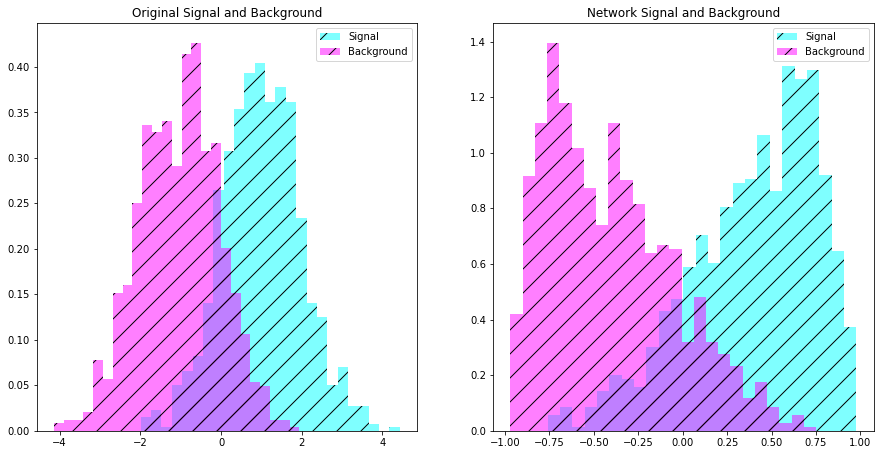

In [4]:
"""
Generate signal/background data which consist
of two 1D Gaussian distributions with sigma=1.0
and a difference in mu=2.0.
"""
from ml_helpers import plot_simple_network_results
# We'll make some fake signal and background data, 
# and then run it through our single node network.
# We'll see that the network doesn't do much.
signal_in = np.random.normal(1.0,1.0,1000)
background_in = np.random.normal(-1.0,1.0,1000)
# choose a weight 
omega = 0.5
# apply the neural network transformation
signal_out = np.tanh(omega * signal_in)
background_out = np.tanh(omega * background_in)

# Now to plot the before and after
plot_simple_network_results(
    signal_in,
    background_in,
    signal_out,
    background_out
)

#### A more complex network
---------------------------

The network transformation doesn't do much, mostly because we are only doing a coordinate transformation when we map from one variable to another. Let's make the network a little more complex and see what happens.

![alt text](node2.png "More complex network")

Here we have introduced a new feature, the hidden layer of the network.  This hidden layer has two nodes and is connected to both the input and the output nodes through a set of weights.  Labeling the hidden layers by $x_1$ and $x_2$ we can write their values based on the inputs as

$$
\begin{align}
x_1 = \tanh(\omega_1\cdot x_{\mathrm{in}})\\
x_2 = \tanh(\omega_2\cdot x_{\mathrm{in}})
\end{align}
$$

The difference from before comes with the output, which now has two inputs.  The way we write the value of the output is the activation function evaluated on the sum of the inputs, thus we have

$$
\begin{align}
x_{\mathrm{out}} &= \tanh\left(\sum_{i=1}^N\omega_{i}\cdot x_i\right)\\ 
&= \tanh\left(\omega_{\mathrm{out},1}\cdot x_1 + \omega_{\mathrm{out},2}\cdot x_2\right)\\
&= \tanh\left(\omega_{\mathrm{out},1}\cdot \tanh(\omega_1\cdot x_{\mathrm{in}}) + \omega_{\mathrm{out},2}\cdot \tanh(\omega_2\cdot x_{\mathrm{in}})\right)
\end{align}
$$

This seems like a strange thing to do, but it allows us to fit a hyperplane to the data by transforming the data space in a non-linear way which stretches the space and even projects it into higher dimensions.  

This particular network has four tunable parameters; $\omega_1, \omega_2, \omega_{\mathrm{out},1}$ and $\omega_{\mathrm{out},2}$ which are what we need to adjust based on the particular problem we are looking at.  By adjusting these parameters, we are adjusting the function $x_{\mathrm{out}} = f(x_{\mathrm{in}})$ so that it gives us the best guess about which class each of the $x_{\mathrm{in}}$ belong to.  The output of the function is the 'score' of the network and is analogous to the likelihood score I had mentioned in the beginning.  The neural network then allows us to skip the step of generating a probability distribution of the data which is essentially what the neural network is infering when it 'learns' about the problem.  

Before I explain how we get the network to learn a distribution, I'll go over some more of the basic details on structure.
